<a href="https://colab.research.google.com/github/camilasp/Previsao_COVID-19/blob/master/notebook/Projeto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A COVID-19 no município de Botucatu/SP e os primeiros efeitos da vacinação na progressão da pandemia**

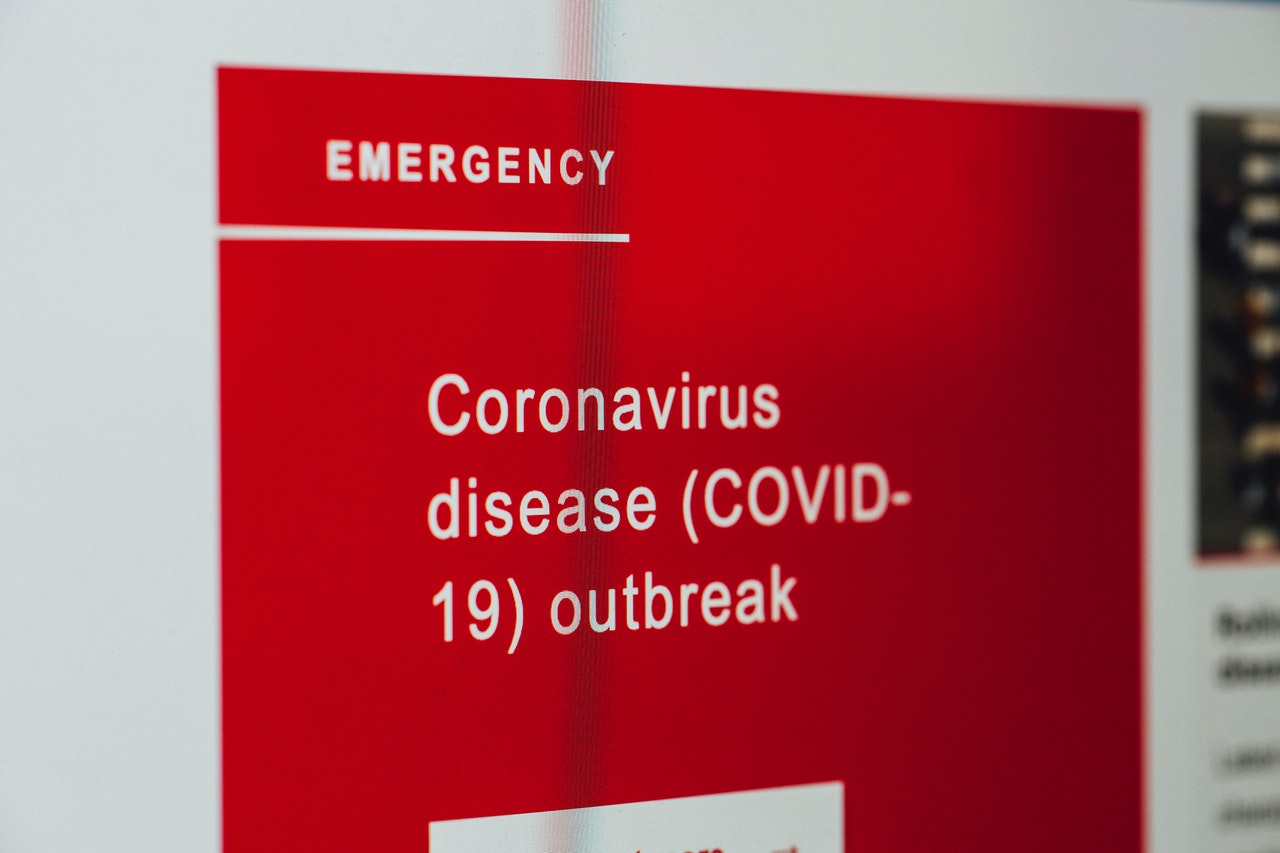

##**1. Introdução**

###**1.1 O que é a COVID-19?**

A COVID-19 é uma doença infecciosa causada pelo coronavírus da síndrome respiratória aguda grave 2(SARS-CoV-2), cujo primeiro caso foi identificado na cidade de Wuhan na China em dezembro de 2019 e desde então se espalhou pelo mundo todo, ocasionando uma pandemia que ainda está em curso. No final de junho/2021, já haviam sido registrados **182 milhões de casos**  registrados no mundo e **3.95 milhões de óbitos** pela doença. No Brasil eram **18.6 milhões de casos** e **512 mil óbitos**. 

A COVID-19 é transmida através de gotículas produzidas nas vias respiratórias das pessoas infetadas. Ao espirrar ou tossir, estas gotículas podem ser inaladas ou atingir diretamente a boca, nariz ou olhos de pessoas em contato próximo.Também podem depositar-se em objetos e superfícies próximos que podem infetar quem nelas toque e leve a mão aos olhos, nariz ou boca. O intervalo de tempo entre a exposição ao vírus e o início dos sintomas é de 2 a 14 dias, sendo em média 5 dias.

###**1.2 Como parar a pandemia de COVID-19?**

Como ocorre na maioria das doenças virais, **não há medicamentos que previnam nem tratamento específico** cuja eficácia tenha sido comprovada para a COVID-19. O manejo da doença é feito com base no alívio dos sintomas e de medidas mais intervencionionistas nos casos de doença grave, onde costuma ser feita a intubação do paciente para que evitar os danos relacionados à baixa oxigênação ocasionada pela doença nesses casos. 

A **prevenção** é baseada em bons **hábitos de higiene**, **uso de mascaras** que protejam da exposição às gotículas de saliva, no **distanciamento social** e na **vacinação** da população.

Desde 2020, várias vacinas foram desenvolvidas e testadas e há uma variedade de vacinas disponíveis atualmente e a imunização da população já se iniciou em grande parte dos países. O Brasil, infelizmente, ainda não conseguiu vacinar uma parcela significativa da população. Até o dia 27 de junho de 2021, 70 325 677 pessoas, equivalente a **33,21% da população brasileira**, foram vacinadas com a 1.ª dose de uma das vacinas; a 2.ª dose foi aplicada em 25 243 190 pessoas, equivalente a 11,92% da população. 


###**1.3 As vacinas contra COVID-19 são eficazes?**

As diversas vacinas disponíveis contra COVID-19 estão sendo amplamente estudadas no mundo todo, buscando entender sua efetividade e seus efeitos na contenção da pandemia.

**Nenhuma das vacinas** disponíveis no mundo atualmente tem eficácia de **100%** contra o vírus Sars-CoV-2, ou seja, elas não impedem que o indivíduo seja infectado e passe a doença para outras pessoas. Mas elas são eficazes de **evitar os casos graves da doença**, que levam à intubação e à morte.

###**1.4 Quanto tempo demora para as vacinas fazerem efeito?**

As vacinas se mostraram eficientes em evitar que a doença seja contraída e transmitida, mas além disso mostraram alta eficácia na diminuição da gravidade da doença, quando contraída.

A **vacina Oxford/AstraZeneca**, por exemplo, conferiu **eficácia** de mais de **70% na primeira dose**, 22 dias após a aplicação. Após a segunda dose, a eficácia chega a quase 100% para casos graves e morte, desde que se tome as duas no período recomendado – 12 semanas. 

No Brasil, há cidades que estão participando em estudos da efetividade da vacinação contra a COVID-19. Este é o caso da cidade estudada neste projeto, a cidade de Botucatu localizada no estado de São Paulo. 

Em 27 de abril de 2021, **a cidade de Botucatu**, interior de São Paulo, foi escolhida pelo Ministério da Saúde para iniciar a **vacinação em massa** na população acima de 18 anos. A vacina utilizada é a vacina produzida pela AstraZeneca em parceria com a Fiocruz. A campanha foi iniciada em 16/maio/2021, quando 65 000 dos cerca de 147 000 habitantes da cidade receberam a primeira dose da vacina. **No final de junho mais de 81% da população da cidade já havia recebido a primeira dose.**

De acordo com o Ministério da Saúde, Botucatu foi escolhida porque reúne uma série de condições que fazem da região o local ideal para esse tipo de análise, que combina testagem em massa e sequenciamento genético da Covid-19.

##**1.1 Objetivos**


*  analisar o número de casos e óbitos por Covid-19 no Estado de São Paulo e na cidade de Botucatu,  utilizando séries temporais referentes aos dados da epidemia no Estado;
* verificar se há indícios de mudança na progressão da pandemia, tanto do número de casos como do número de óbitos, após o recebimento da primeira dose pela população da cidade de Botucatu;
* elaborar previsões com relação à progressão da pandemia utilizando a ferramenta Facebook Prophet.

**Hipótese**

***Será possivel verificar uma mudança nos números da pandemia na cidade de Botucatu( queda do número de casos, óbitos ou ambos) já no final de junho/2021.***


##**2. Preparação dos dados**

Os dados utilizados foram extraídos de três bases de dados diferentes:

Do [site]( https://brasil.io/dataset/covid19/caso_full/) Brasil IO, uma base de dados que contém os dados referentes aos casos confirmados e óbitos obtidos dos boletins das Secretarias Estaduais de Saúde (SES). Os dados foram enriquecidos, de forma que a partir do momento em que um município confirma um caso, ele sempre aparecerá nessa tabela (mesmo que para uma determinada data a SES não tenha liberado o boletim - nesse caso é repetido o dado do dia anterior).

Também foram utilizados dados da pandemia no Estado de São Paulo, obtidos da [base de dados](https://github.com/seade-R/dados-covid-sp) contida no repositório da SEADE e os dados sobre vacinação no Estado de São Paulo, extraídos do [site](https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos/) dos dados abertos de SP.

As bases de dados foram previamente tratadas [**nesse notebook**](https://github.com/camilasp/Previsao_COVID-19/blob/master/notebooks/Limpeza_dados.ipynb) as bases tratadas foram convertidas em arquivos CSV que serão utilizados nas análises e no desenvolvimento de previsões.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from datetime import date

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dados_botucatu = pd.read_csv("https://raw.githubusercontent.com/camilasp/Previsao_COVID-19/master/dados/dados_botucatu.csv")

In [4]:
dados_sp= pd.read_csv("https://raw.githubusercontent.com/camilasp/Previsao_COVID-19/master/dados/dados_sp.csv")

In [5]:
dados_botucatu_sp = pd.read_csv("https://raw.githubusercontent.com/camilasp/Previsao_COVID-19/master/dados/dados_botucatu_sp.csv")

In [6]:
coordenadas = pd.read_csv("https://raw.githubusercontent.com/camilasp/Previsao_COVID-19/master/dados/vacinacao_sp.csv")

In [7]:
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['font.size'] = 18

**Ajustes**: alguns dados diários de óbitos eram negativos, provavelmente uma correção com referência a dados anteriores incluídos erroneamente. Para que a visualização dos dados não ficasse comprometida, procurei os valores negativos, substitui por zero e fiz a subtração dos valores negativos na data anterior mais próxima com valor positivo.

In [8]:
dados_botucatu.query('obitos_novos < 0')

,city,state,date,casos,casos_novos,obitos,obitos_novos
193,Botucatu,SP,2020-10-14,2485,22,47,-1
351,Botucatu,SP,2021-03-21,9254,5,126,-1
419,Botucatu,SP,2021-05-28,12008,-1,224,-2


In [9]:
dados_botucatu.query('index== 418')

,city,state,date,casos,casos_novos,obitos,obitos_novos
418,Botucatu,SP,2021-05-27,12009,63,226,2


In [10]:
dados_botucatu.loc[193, "obitos_novos"] = 0
dados_botucatu.loc[351, "obitos_novos"] = 0
dados_botucatu.loc[419, "obitos_novos"] = 0

In [11]:
dados_botucatu.loc[191,"obitos_novos"]  = 0

In [12]:
dados_botucatu.loc[350,"obitos_novos"]  = 1

In [13]:
dados_botucatu.loc[418,"obitos_novos"]  = 0

##**3. Análise Exploratória**

Começaremos explorando a base de dados do Estado de São Paulo encontrada em https://github.com/seade-R/dados-covid-sp e atualizada diariamente. Essa Primeira análise contém os dados até a data de 30/06/2021.

### **3.1 A pandemia de COVID-19 no Estado de São Paulo**

In [14]:
coordenadas =coordenadas.set_index('nome_munic')
coordenadas.head()

,porcentagem_vacinada,doses_aplicadas,populacao,datahora,latitude,longitude,casos,obitos,casos_pc,obitos_pc
nome_munic,,,,,,,,,,
BOTUCATU,0.817694,121125,148130,2021-06-30,-22.8837,-48.4437,15154,271,10737.237397,192.014738
SERRANA,0.756989,34552,45644,2021-06-30,-21.2043,-47.5952,4249,89,9562.497187,200.297070
TURMALINA,0.699882,1187,1696,2021-06-30,-20.0486,-50.4792,169,4,9362.880886,221.606648
FLORA RICA,0.668531,956,1430,2021-06-30,-21.6727,-51.3821,121,4,7614.852108,251.730648
URU,0.667823,770,1153,2021-06-30,-21.7866,-49.2848,156,3,12924.606462,248.550124


**Total de casos e óbitos no Estado de SP:**


Até o momento temos **3.72 milhões** de casos e mais de **127 mil** óbitos confirmados.

In [15]:
total_casos_obitos = coordenadas.sum()

In [16]:
total_casos_obitos[['casos', 'obitos']]

casos     3726406
obitos     127681
dtype: object

**Casos e óbitos por cada 100 mil habitantes:**

**Casos**

Abaixo o número de casos confirmados para cada 100 mil habitantes para os municípios do Estado de São Paulo em ordem crecente. A menor taxa é de **São Luiz do Paraitinga com cerca de 700 casos por 100 mil** habitantes, enquanto que a maior, do município de **Gavião Peixoto, chega a 26.7 mil casos por cada 100 mil habitantes**.

Ou seja, os municípios do Estado foram afetados de forma desigual pela pandemia com relação ao número de casos em relação à população.

In [17]:
coordenadas['casos_pc'].sort_values()


nome_munic
SÃO LUIZ DO PARAITINGA      700.160848
PEDREGULHO                 1677.007187
VARGEM                     1760.000000
MARABÁ PAULISTA            1926.586899
PIQUETE                    2352.165311
                              ...     
GUAREÍ                    20260.317460
CORDEIRÓPOLIS             20446.707177
IGARATÁ                   20586.340206
BADY BASSITT              21703.717313
GAVIÃO PEIXOTO            26746.203905
Name: casos_pc, Length: 645, dtype: float64

In [18]:
media= coordenadas.mean()

In [19]:
font_t = {'family': 'sans-serif',
        'color': '#777D62',
        'weight': 'bold'
         }

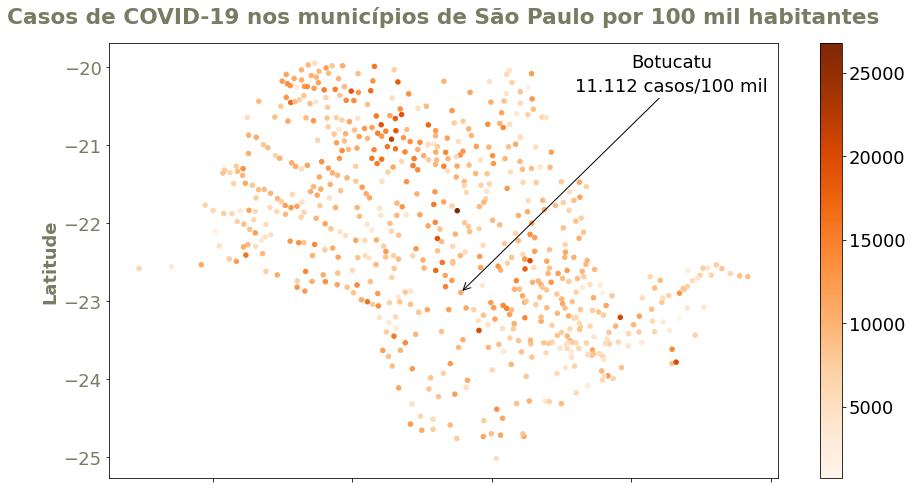

In [20]:
coordenadas.plot.scatter(y='latitude', x = 'longitude', c = coordenadas['casos_pc'],cmap = 'Oranges', alpha=1.5, figsize=(15,8))
plt.title("Casos de COVID-19 nos municípios de São Paulo por 100 mil habitantes",fontdict=font_t, pad= 20)
plt.ylabel('Latitude', fontdict= font_t)
plt.tick_params(axis='y', labelcolor= '#777D62')
plt.annotate(xy=(-48.4437, -22.8837), xytext= (-46, -20), s= "Botucatu")
plt.annotate(xy=(-48.4437, -22.8837), xytext= (-46.8, -20.3), s= "11.112 casos/100 mil", arrowprops=dict(arrowstyle="->"))
plt.show()

In [21]:
media['casos']

5777.373643410852

Podemos perceber através deste mapa que a grande maioria dos municípios tem uma taxa de casos/100 mil habitantes abaixo dos 15 mil casos por 100 mil habitantes, sendo que **a média de casos por 100 mil no Estado foi de 5.777 casos**. Há uma concentração de municípios na região norte do Estado com número de casos por 100 mil hab. mais alto. Botucatu teve cerca de 10 mil casos por cada 100 mil hab.

**Óbitos**

Os números de óbitos por cada 100 mil habitantes também apresentaram uma variação significativa, havendo casos de **localidades sem óbitos** enquanto que outros municípios chegaram a registrar **mais de 700 óbitos** por 100 mil hab.

In [22]:
coordenadas['obitos_pc'].sort_values()

nome_munic
SÃO JOÃO DO PAU D'ALHO      0.000000
FERNÃO                      0.000000
AREIAS                     26.021337
BANANAL                    28.166369
TUIUTI                     30.501754
                             ...    
ONDA VERDE                568.047337
MERIDIANO                 695.373094
SANTA CLARA D'OESTE       697.906281
BÁLSAMO                   715.626466
PARISI                    730.282376
Name: obitos_pc, Length: 645, dtype: float64

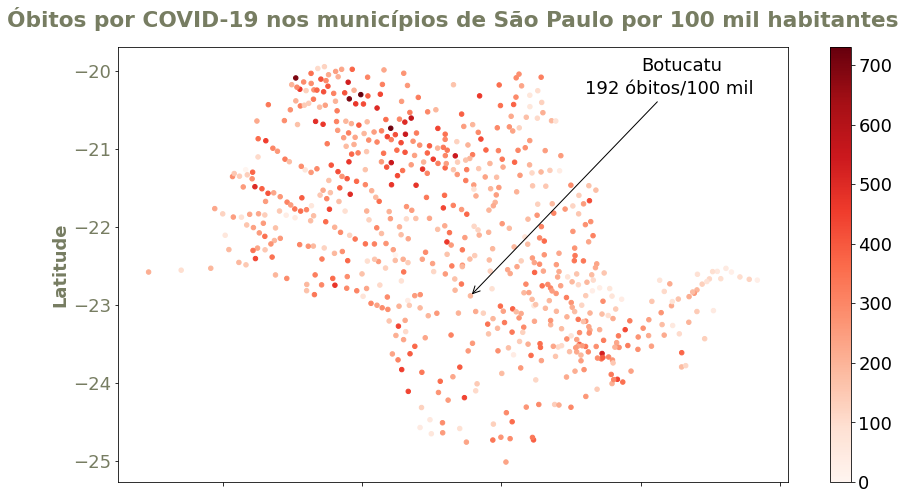

In [23]:
coordenadas.plot.scatter(y='latitude', x = 'longitude', c = coordenadas['obitos_pc'],cmap = 'Reds', alpha=1.5)
plt.title("Óbitos por COVID-19 nos municípios de São Paulo por 100 mil habitantes", pad= 20, fontdict=font_t)
plt.ylabel('Latitude', fontdict= font_t)
plt.tick_params(axis='y', labelcolor= '#777D62')
plt.annotate(xy=(-48.4437, -22.8837), xytext= (-46, -20), s= "Botucatu")
plt.annotate(xy=(-48.4437, -22.8837), xytext= (-46.8, -20.3), s= "192 óbitos/100 mil", arrowprops=dict(arrowstyle="->"))
plt.show()

In [24]:
media['obitos']

197.95503875968993

Pelo mapa acima, verificamos que a maioria dos municípios registrou menos de 300 óbitos por 100 mil habitantes, sendo que a média foi de 197 óbitos por 100 mil habitantes.

Botucatu teve 192 óbitos por 100 mil habitantes.

**Vacinação**

Com relação à vacinação, **a média do Estado é de 42%** da população vacinada com pelo menos uma dose. Também há grande variação entre os municípios do Estado. **Botucatu** já tem mais de **81% da população** vacinada com pelo menos uma dose por estar participando do estudo já mencionado.
Enquanto isso, a cidade de **Balbinos** teve apenas **17,5%** de sua população vacinada.

In [25]:
coordenadas['porcentagem_vacinada'].sort_values(ascending= False)

nome_munic
BOTUCATU               0.817694
SERRANA                0.756989
TURMALINA              0.699882
FLORA RICA             0.668531
URU                    0.667823
                         ...   
VÁRZEA PAULISTA        0.257307
IARAS                  0.241042
LAVÍNIA                0.227350
RIO GRANDE DA SERRA    0.220118
BALBINOS               0.175261
Name: porcentagem_vacinada, Length: 645, dtype: float64

In [26]:
media['porcentagem_vacinada']

0.4248943116837211

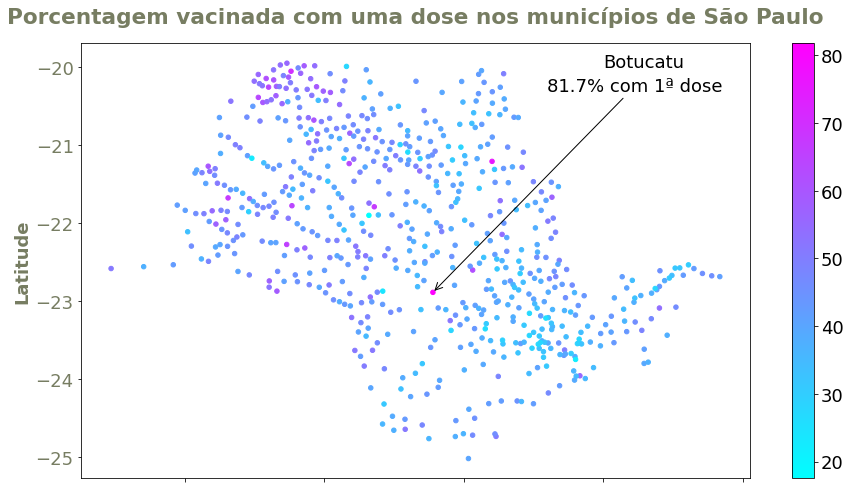

In [27]:
coordenadas.plot.scatter(y='latitude', x = 'longitude', c = coordenadas['porcentagem_vacinada']*100,cmap = 'cool', alpha=1.5)
plt.title("Porcentagem vacinada com uma dose nos municípios de São Paulo",  pad= 20, fontdict=font_t)
plt.ylabel('Latitude', fontdict= font_t)
plt.tick_params(axis='y', labelcolor= '#777D62')
plt.annotate(xy=(-48.4437, -22.8837), xytext= (-46, -20), s= "Botucatu")
plt.annotate(xy=(-48.4437, -22.8837), xytext= (-46.8, -20.3), s= "81.7% com 1ª dose", arrowprops=dict(arrowstyle="->"))
plt.show()

Pelo mapa podemos verificar que são poucos os pontos com um percentual de vacinados maior que 60%, ficando a maioria dos municípios na faixa entre 50% e 30%.

### **3.2 A pandemia em Botucatu/SP**

**Agora vamos analisar o comportamento da pandemia em Botucatu antes e após o ínicio da vacinação em massa.**


**Primeiramente, um resumo dos dados:**



**Os dados de Botucatu em 01/07/2021:**

* 15.683 **casos** confirmados (11.112 casos por 100 mil habitantes)

* 271 **óbitos** confirmados (192 óbitos por 100 mil habitantes)

* 81,7% da **população vacinada** com a primeira dose




In [28]:
dados_botucatu['date'] =  pd.to_datetime(dados_botucatu['date'], format='%Y-%m-%d')

In [29]:
dados_botucatu_sp.tail(1)

,nome_munic,datahora,latitude,longitude,casos,obitos,casos_pc,obitos_pc
492,Botucatu,2021-07-01,-22.8837,-48.4437,15683,271,11112.055833,192.014738


**Casos**

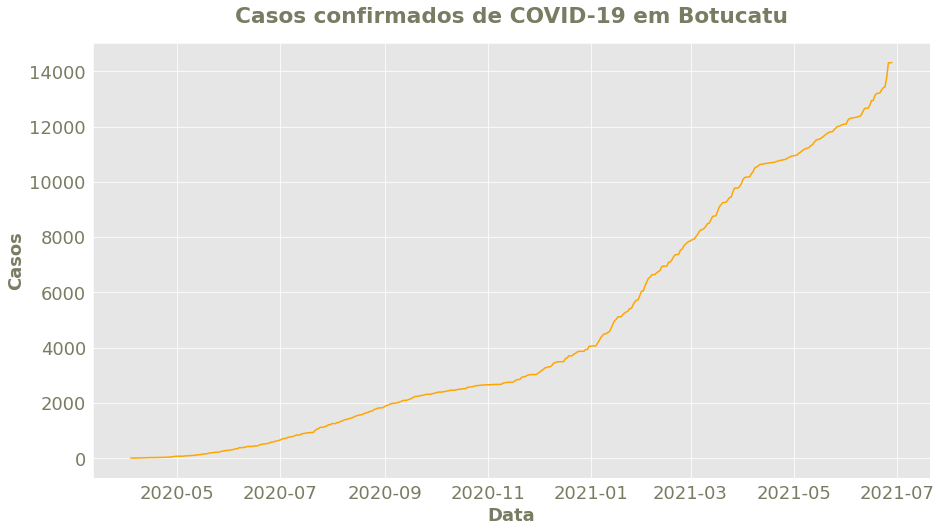

In [30]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.lineplot(data= dados_botucatu, x='date', y= 'casos', color='orange')
plt.title("Casos confirmados de COVID-19 em Botucatu",  pad= 20, fontdict=font_t)
plt.ylabel('Casos', fontdict= font_t)
plt.xlabel('Data', fontdict= font_t)
plt.tick_params(labelcolor= '#777D62')


Neste gráfico visualizamos que o número de casos de COVID-19 em 2021 é muito superior ao número de casos do ano anterior. **Até o final de 2020**, eram cerca de **4000 casos** confirmados e de **janeiro/2021 ao final de junho/2021**, já são **mais de 10.000** novos casos confirmados, totalizando mais de 14 mil no período total de duração da pandemia até agora. 

A **tendência** continua de **crescimento**, porém menor que o visto entre janeiro e maio deste ano, quando o número de casos registrados mais do que dobrou.


**Óbitos**

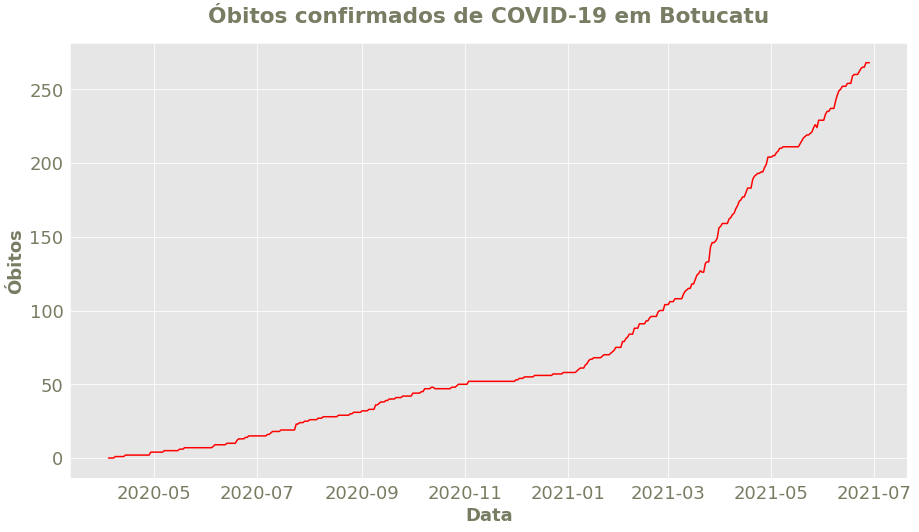

In [31]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.lineplot(data= dados_botucatu, x='date', y= 'obitos', color='red')
plt.title("Óbitos confirmados de COVID-19 em Botucatu",  pad= 20, fontdict=font_t)
plt.ylabel('Óbitos', fontdict= font_t)
plt.xlabel('Data', fontdict= font_t)
plt.tick_params(labelcolor= '#777D62')



No caso dos óbitos, a discrepância entre os números de 2020 e 2021 é ainda maior, com o número de **óbitos** tendo quintuplicado este ano, indo de cerca **de 50** no final de **2020**,  para mais de **250 em 2021.** Esse crescimento desproporcional do número de óbitos em relação ao número de casos,  pode ser explicado pela superlotação e falta de vagas em hospitais.

A tendência parece ser crescente ainda, porém com menor intensidade do que a visualizada entre janeiro e maio deste ano.

**Médias móveis de casos e óbitos**

Ao invés de utilizar os dados de casos e óbitos novos diários eu **optei por calcular e utilizar as médias móveis** na maioria das minhas análises e previsões. Achei mais adequado, especialmente porque a base de dados utilizada tem bastante correções(valores negativos) e possivelmente represamento de dados que depois são registrados de uma só vez e que não representam, portanto, o curso natural da pandemia.

In [32]:
dados_botucatu['media_movel_casos']=dados_botucatu['casos_novos'].rolling(window=7, center=False).mean()
dados_botucatu['media_movel_obitos']=dados_botucatu['obitos_novos'].rolling(window=7, center=False).mean()

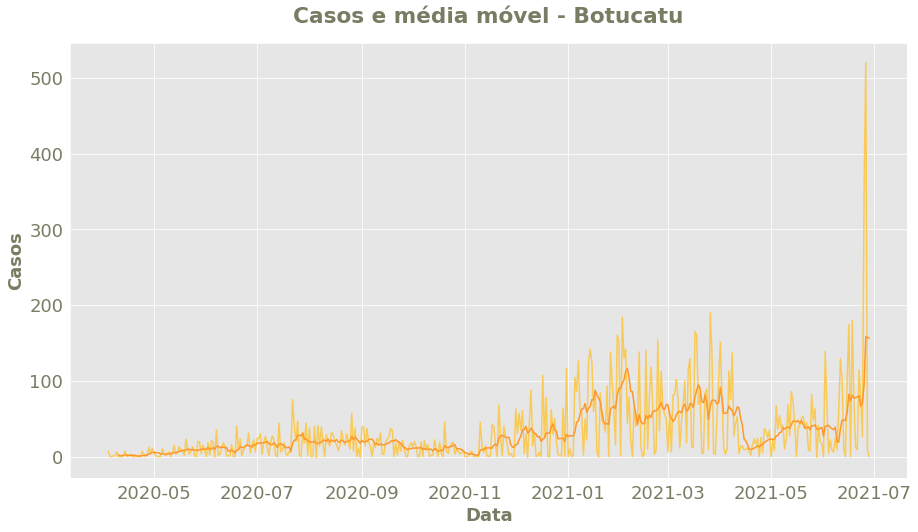

In [33]:
sns.lineplot(x='date',y='casos_novos',data=dados_botucatu, color = '#FACA57').set_title('Casos e média móvel - Botucatu', pad = 20, fontdict=font_t)
sns.lineplot(x='date',y='media_movel_casos',data=dados_botucatu, color ='#FF9729')
plt.ylabel('Casos', fontdict= font_t)
plt.xlabel('Data', fontdict= font_t)
plt.tick_params(labelcolor= '#777D62')


O gráfico nos mostra que por volta de abril/2021 o número de casos parecia estar em queda, entretanto voltou a subir a partir da metade de junho, aproximadamente. Esse aumento súbito de casos que ocorreu quando grande parte da população de Botucatu já favia recebido a primeira dose da vacina e pode ser que isso não fosse o esperado, porém, algumas hipóteses podem ser levantadas:
* As pessoas diminuíram os cuidados por acreditar que já estavam protegidas;
* Como a cidade é objeto de estudo, está ocorrendo uma maior testagem, levando a descoberta de casos positivos mesmo quando assintomáticos;
* Apenas uma dose da vacina não confere proteção suficiente e não impede as pessoas de contraírem a doença, pois a circulação do vírus ainda é muito grande.

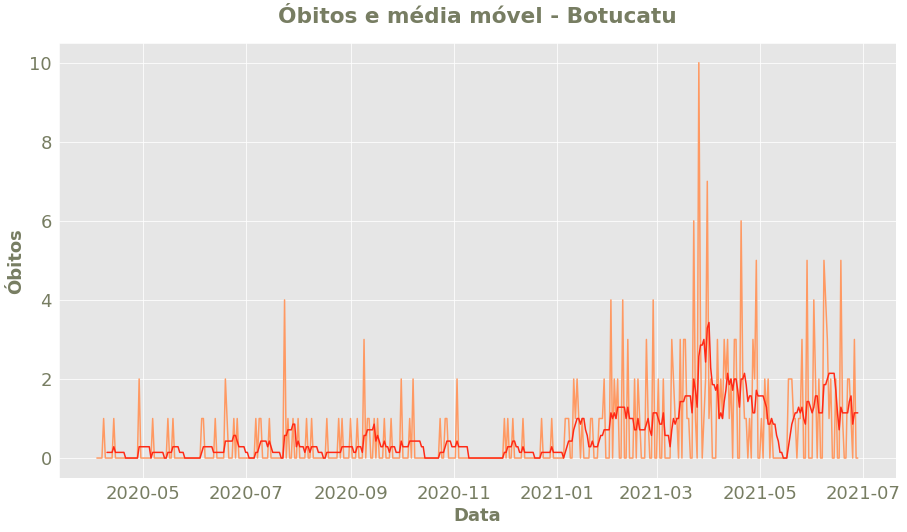

In [35]:
sns.lineplot(x='date',y='obitos_novos',data=dados_botucatu, color="#FF9962").set_title('Óbitos e média móvel - Botucatu', pad = 20, fontdict=font_t)
sns.lineplot(x='date',y='media_movel_obitos',data=dados_botucatu, color='#FF2A16')
plt.ylabel('Óbitos', fontdict= font_t)
plt.xlabel('Data', fontdict= font_t)
plt.tick_params(labelcolor= '#777D62')


Ao contrário do que foi observado no caso da média móvel de casos, a média móvel de óbitos parece apresentar uma **leve queda** no final de junho, com médias em geral mais baixas em junho do que nos meses de abril e maio de 2021. 
Essa queda pode ser **um primeiro efeito visível da vacinação** da população, uma vez que a vacina, sabidamente, tem como efeito a diminuição da gravidade da doença quando contraída.

In [36]:
dados_botucatu['ano'] = pd.DatetimeIndex(dados_botucatu['date']).year

In [37]:
dados_botucatu['mes'] = pd.DatetimeIndex(dados_botucatu['date']).month

In [38]:
dados_botucatu.head()

,city,state,date,casos,casos_novos,obitos,obitos_novos,media_movel_casos,media_movel_obitos,ano,mes
0,Botucatu,SP,2020-04-04,7,7,0,0,NaN,NaN,2020,4
1,Botucatu,SP,2020-04-05,7,0,0,0,NaN,NaN,2020,4
2,Botucatu,SP,2020-04-06,7,0,0,0,NaN,NaN,2020,4
3,Botucatu,SP,2020-04-07,8,1,0,0,NaN,NaN,2020,4
4,Botucatu,SP,2020-04-08,9,1,1,1,NaN,NaN,2020,4


In [39]:
dados_botucatu= dados_botucatu.dropna()

In [43]:
dados_2021 = dados_botucatu.copy().query('ano == 2021')

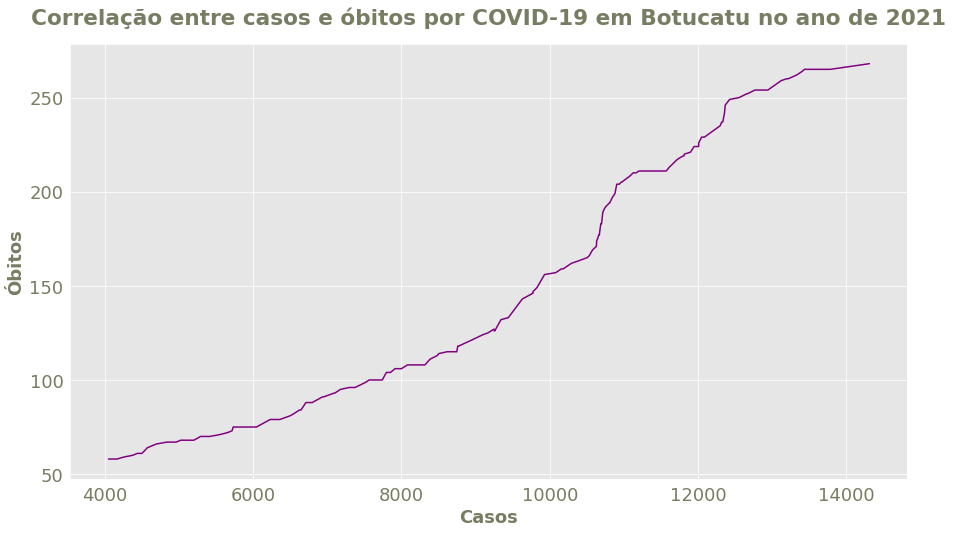

In [44]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = sns.lineplot(data= dados_2021, x='casos', y= 'obitos', color='purple')
plt.title("Correlação entre casos e óbitos por COVID-19 em Botucatu no ano de 2021",  pad= 20, fontdict=font_t)
plt.ylabel('Óbitos', fontdict= font_t)
plt.xlabel('Casos', fontdict= font_t)
plt.tick_params(labelcolor= '#777D62')

Analisando a correlação entre o número de casos e óbitos em 2021, percebemos como em certos momentos(entre 10.500 e 11.500 casos, por exemplo) o crescimento do número de óbitos era bem maior que do número de casos. Nem sempre a correlação entre casos e óbitos é clara, pois entre a confirmação do diagnóstico e o falecimento pode levar dias, semanas e até meses em alguns casos.

Essa curva também nos ajuda a ver ( forma uma reta quase horizontal no final) que **atualmente o número de óbitos está estável em relação ao número de casos**, o que corrobora nossas análises anteriores, que mostraram que a **média de casos continua a crescer, enquanto a de óbitos parece mostrar uma tendência de queda.**

In [48]:
dados_recente = dados_botucatu.query('mes==4 & ano==2021 | mes==5 & ano==2021')

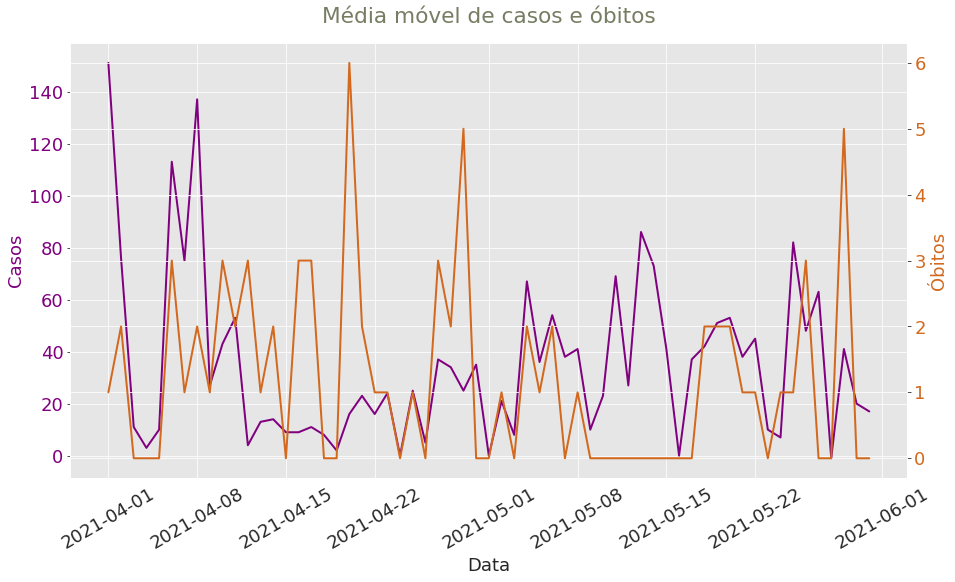

In [49]:
color='purple'
ax1 = sns.lineplot(x = 'date', y = 'casos_novos', data = dados_recente, color=color, linewidth=2)
ax1.set_xlabel('Data')
ax1.set_ylabel('Casos', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation='30')
ax2= ax1.twinx()
color = 'chocolate'
ax2 = sns.lineplot(x = 'date', y = 'obitos_novos', data = dados_recente, color = color, linewidth=2)
ax2.set_ylabel('Óbitos', color=color) 
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Média móvel de casos e óbitos', color='#777D62', pad= 20)
plt.show()


Esse gráfico deixa mais claro que **nem sempre os picos de casos e óbitos coincidem**, como já explicado, isso provavelmente tem relação com o fato de que os óbitos por COVID-19 demoram em geral alguns dias para ocorrer após o diagnóstico.

**Correlação Cruzada**


Para finalizar a análise quanto a correlação entre casos e óbitos diários(usei a média móvel), vou utilizar a função cross-correlation da biblioteca statsmodels.

Quanto maior a correlação, mais a curva se aproxima do 1. Quanto mais perto do 0, menor a correlação.

O gráfico abaixo nos mostra que há certa correlação entre os dados(chega a 0.5) que porém não é tão forte, como já discutido.

In [54]:
import statsmodels.api as sm

In [55]:
correlacao= sm.tsa.stattools.ccf(dados_botucatu['media_movel_casos'], dados_botucatu['media_movel_obitos'], unbiased= False)

In [56]:
lag = range(0, len(correlacao))

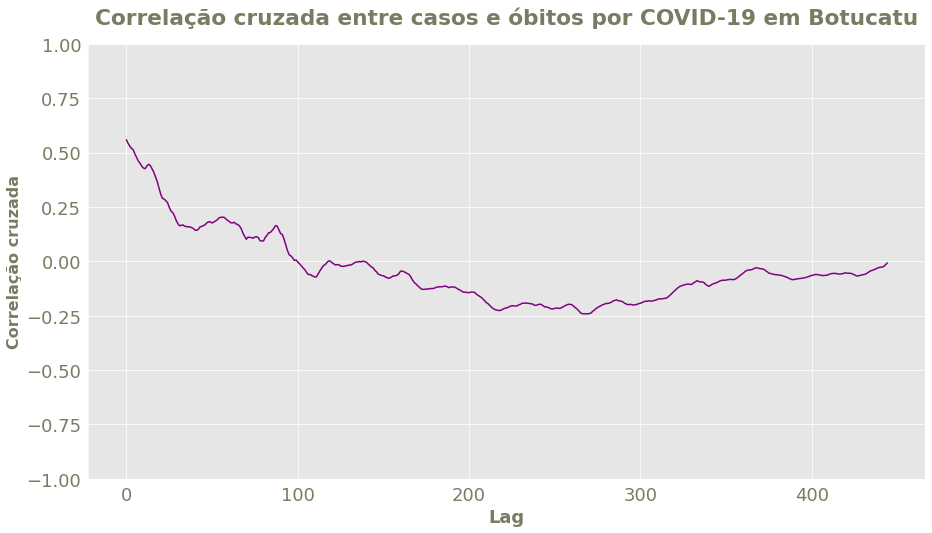

In [342]:
plt.plot(lag, correlacao, color='purple')
plt.ylim(-1, 1)
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Lag', fontdict=font_t)
plt.ylabel('Correlação cruzada', fontsize=16, fontdict=font_t)
plt.title('Correlação cruzada entre casos e óbitos por COVID-19 em Botucatu', pad= 20, fontdict=font_t)
plt.show()

**Sazonalidade dos dados**

Agora vamos verificar se há sazonalidade nos dados utilizando a função de autocorrelação. Essa função analisa a existência de padrões dos dados em função do tempo.

In [50]:
from pandas.plotting import autocorrelation_plot

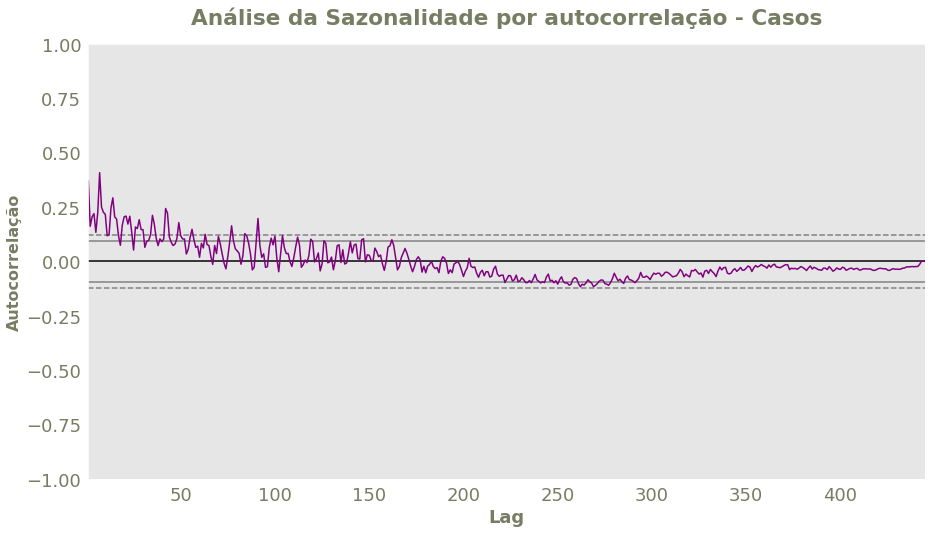

In [57]:
autocorrelation_plot(dados_botucatu['casos_novos'], color='purple')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Lag', fontdict=font_t)
plt.ylabel('Autocorrelação', fontsize=16, fontdict=font_t)
plt.title('Análise da Sazonalidade por autocorrelação - Casos', pad= 20, fontdict=font_t)
plt.show()

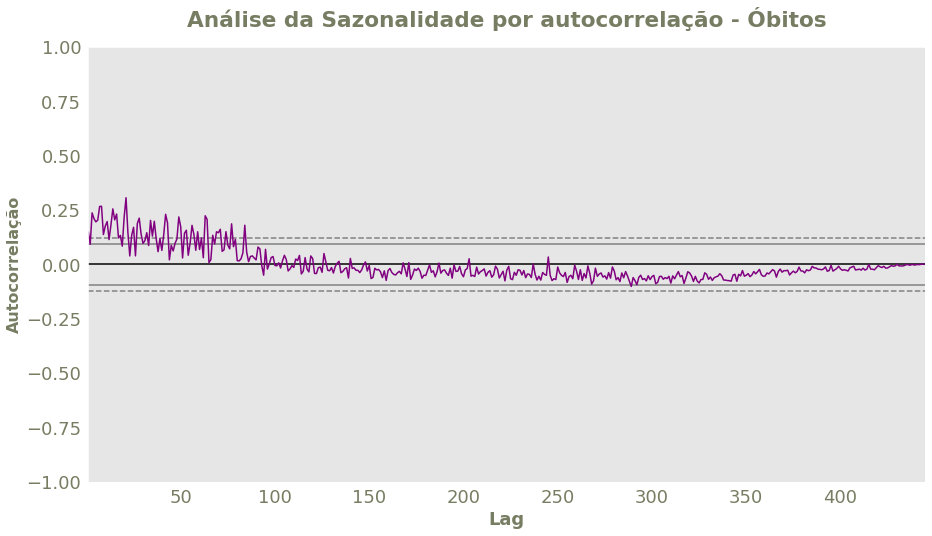

In [59]:
autocorrelation_plot(dados_botucatu['obitos_novos'], color = 'purple')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Lag', fontdict=font_t)
plt.ylabel('Autocorrelação', fontsize=16, fontdict=font_t)
plt.title('Análise da Sazonalidade por autocorrelação - Óbitos', pad= 20, fontdict=font_t)
plt.show()

Tanto para os casos quanto para os óbitos **a autocorrelação é muito fraca**, estando sempre próxima a zero, ou seja, não parece haver nenhum tipo de sazonalidade significativa nos dados.

##**4.Desenvolvimento de Previsões com o Prophet**

Agora partiremos para criação de modelos de previsão utilizando o Prophet. O objetivo é tentar prever a progressão da pandemia através da previsão das médias de casos e óbitos futuras.

Para isso, será necessário testar alguns modelos, alterando certos parâmetros para conseguir um modelo que se adapte bem a nossa curva, evitando o overfitting, que é o que ocorre quando o modelo se ajusta tanto à curva que perde a capacidade de generalização, fazendo com que as previsões fiquem incorretas.

###**4.1 Modelos de Previsão**

**4.11 Casos**

In [124]:
dados_botucatu

,city,state,date,casos,casos_novos,obitos,obitos_novos,media_movel_casos,media_movel_obitos,ano,mes
6,Botucatu,SP,2020-04-10,15,0,1,0,2.142857,0.142857,2020,4
7,Botucatu,SP,2020-04-11,15,0,1,0,1.142857,0.142857,2020,4
8,Botucatu,SP,2020-04-12,15,0,1,0,1.142857,0.142857,2020,4
9,Botucatu,SP,2020-04-13,16,1,1,0,1.285714,0.142857,2020,4
10,Botucatu,SP,2020-04-14,23,7,2,1,2.142857,0.285714,2020,4
...,...,...,...,...,...,...,...,...,...,...,...
446,Botucatu,SP,2021-06-24,13433,26,265,1,70.285714,1.571429,2021,6
447,Botucatu,SP,2021-06-25,13782,349,265,0,94.428571,0.857143,2021,6
448,Botucatu,SP,2021-06-26,14302,520,268,3,158.142857,1.142857,2021,6
449,Botucatu,SP,2021-06-27,14310,8,268,0,157.571429,1.142857,2021,6


Temos 445 dias com dados para utilização. Uma parte desses dias será usada para fazer o modelo e o restante para testar o modelo. 

É necessário criar dois novos dataframes com apenas duas colunas, a coluna com as datas e a coluna com os valores correspondentes.Um será o dataframe que vai rodar o modelo e o outro os testes.

In [61]:
from fbprophet import Prophet

In [62]:
botucatu= pd.DataFrame()

In [63]:
botucatu['ds']= dados_botucatu['date'][:400]
botucatu['y']= dados_botucatu['media_movel_casos'][:400]

Vou criar o meu primeiro modelo sem ajuste de parâmetros, mas testarei outros modelos com ajustes. 

In [64]:
modelo_casos= Prophet()

In [65]:
modelo_casos.fit(botucatu)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
botucatu_futuro = modelo_casos.make_future_dataframe(periods=60)
botucatu_futuro.head()

,ds
0,2020-04-10
1,2020-04-11
2,2020-04-12
3,2020-04-13
4,2020-04-14


In [74]:
previsao_casos= modelo_casos.predict(botucatu_futuro)

In [75]:
previsao_casos.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-10,5.849540,-11.339078,22.925768,5.849540,5.849540,0.109377,0.109377,0.109377,0.109377,0.109377,0.109377,0.0,0.0,0.0,5.958917
1,2020-04-11,5.911752,-10.967797,21.618619,5.911752,5.911752,-0.023841,-0.023841,-0.023841,-0.023841,-0.023841,-0.023841,0.0,0.0,0.0,5.887911
2,2020-04-12,5.973963,-11.569617,23.238868,5.973963,5.973963,-0.070512,-0.070512,-0.070512,-0.070512,-0.070512,-0.070512,0.0,0.0,0.0,5.903451
3,2020-04-13,6.036174,-11.137914,22.671368,6.036174,6.036174,-0.089750,-0.089750,-0.089750,-0.089750,-0.089750,-0.089750,0.0,0.0,0.0,5.946424
4,2020-04-14,6.098386,-10.001926,22.200296,6.098386,6.098386,-0.008469,-0.008469,-0.008469,-0.008469,-0.008469,-0.008469,0.0,0.0,0.0,6.089916


O dataframe acima mostra as previsões feitas pelo modelo. A coluna **yhat** mostra a previsão dos números de casos.

Criando o dataframe de teste, vamos verificar se as previsões se aproximam dos dados reais. Vou utilizar o restante dos meus dados para compor esse dataframe e verificar se nossa previsão está ajustada a esses pontos:

In [76]:
df_teste = pd.DataFrame()
df_teste['ds'] = dados_botucatu['date'][400:]
df_teste['y'] =dados_botucatu['media_movel_casos'][400:]

Agora vamos plotar o gráfico com o modelo de previsão e também os meus dados de teste para verificar se estão dentro da previsão:

In [90]:
from fbprophet.plot import add_changepoints_to_plot

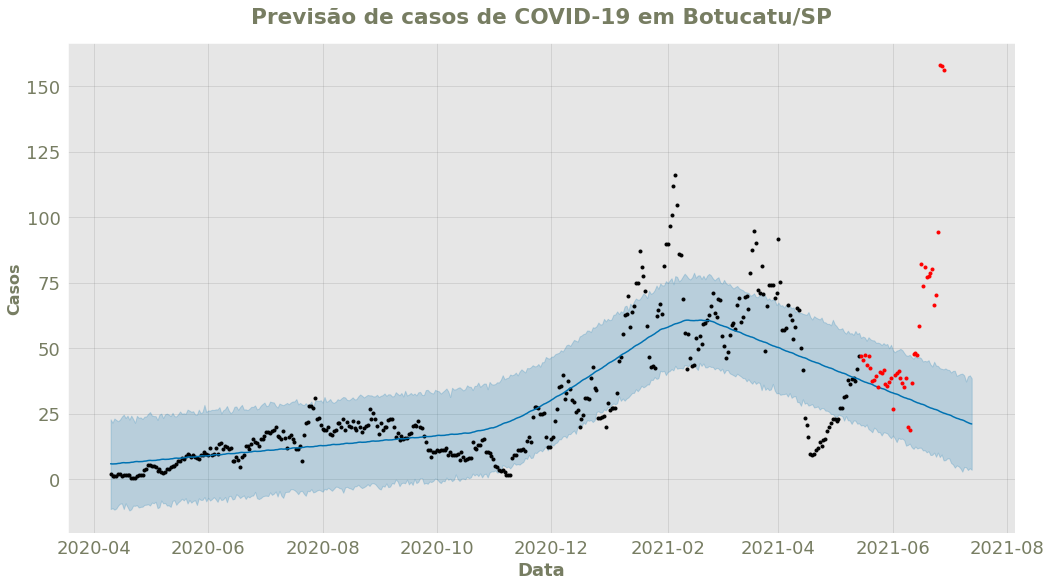

In [123]:
modelo_casos.plot(previsao_casos, figsize=(15,8))
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Casos', fontsize=16, fontdict=font_t)
plt.title('Previsão de casos de COVID-19 em Botucatu/SP', pad= 20, fontdict=font_t)
plt.show()

O primeiro modelo, que foi feito sem alteração de parâmetros, não parece se encaixar muito bem a nossa curva, pois tem muitos pontos que ficaram fora do intervalo de confiança, que é a sombra azul clara em torno da curva de previsão.
Os pontos escuros são os dados utilizados no modelo e os vermelhos são os dados de teste. Verificamos que há muitos pontos vermelhos fora do intervalo de confiança também, o que mostra que o modelo não conseguiu fazer uma boa previsão.

**Para efeito de comparação com os próximos modelos que serão testados, vou utilizar uma métrica estatística, o mean absolute error, que representa o quanto em média há de erro absoluto entre o valor real e o valor previsto.**

In [83]:
from sklearn.metrics import mean_absolute_error

In [84]:
mean_absolute_error(botucatu['y'],previsao_casos['yhat'][:400])

9.573605935676882

Apesar da análise de autocorrelação não ter mostrado efeito sazonal significativo nas séries temporais analisadas, vou criar um novo modelo, alterando o parâmetro **seasonality_mode**, para o qual podemos atribuir o valor multiplicative ou additive. 

O valor additive é o default, e representa a adição de um fator sazonal constante, enquanto que na multiplicativa esse valor varia com a tendência. Vou testar se há diferença no nosso modelo para a opção multiplicative.



In [93]:
modelo2_casos = Prophet(seasonality_mode='multiplicative', n_changepoints=25) 
modelo2_casos.fit(botucatu)
botfuturo2 = modelo2_casos.make_future_dataframe(periods=60)
previsao2_casos = modelo2_casos.predict(botfuturo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


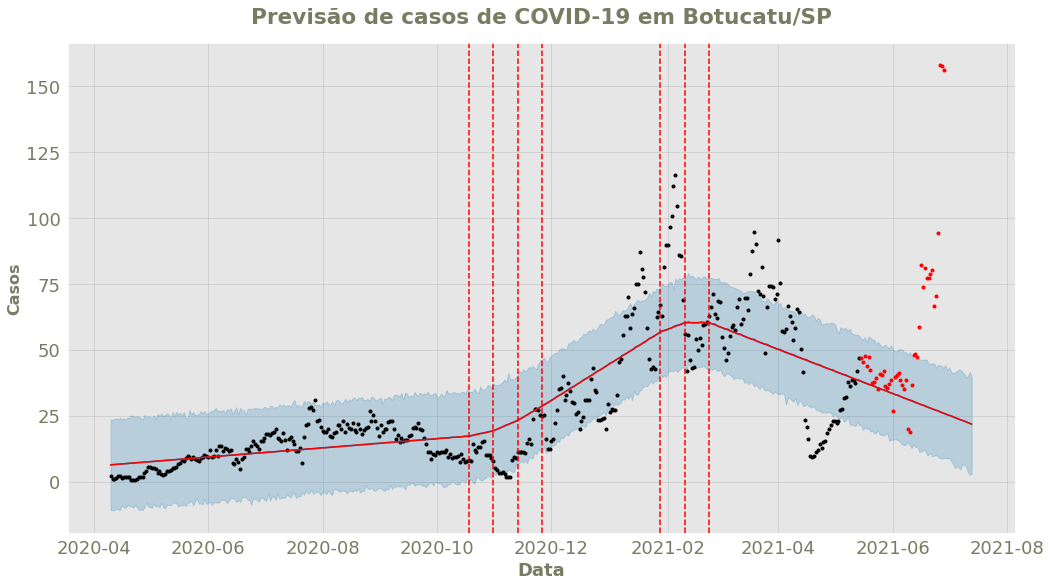

In [124]:
fig = modelo2_casos.plot(previsao2_casos, figsize=(15,8));
a = add_changepoints_to_plot(fig.gca(), modelo2_casos, previsao2_casos)
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Casos', fontsize=16, fontdict=font_t)
plt.title('Previsão de casos de COVID-19 em Botucatu/SP', pad= 20, fontdict=font_t)
plt.show()


As retas pontilhadas vermelhas adicionadas a esse gráfico mostram os **changepoints**, que são mudanças significativas na trajetória da série temporal. O Prophet detecta automaticamente esse changepoints e adapta o modelo em conformidade com eles. 

Com relação ao modelo testado, visualmente não **parece haver diferença para o modelo anterior**, com sazonalidade aditiva. 

Vamos ver o que nos diz a análise da **métrica mean absolute error:**


In [95]:
mean_absolute_error(botucatu['y'],previsao2_casos['yhat'][:400])

9.636442349126357

Houve **um leve aumento no resultado** da métrica quando comparado ao primeiro modelo, visto que a média de erro absoluto aumentou, se distanciando mais do 0, que seria o ideal. Portanto esse segundo modelo também não parece muito adequado.






Para o próximo modelo, farei **a alteração de dois parâmetros** que podem estar dificultando o ajuste do modelo de previsão aos dados. 

O primeiro deles é o **changepoint prior scale** que determina o quão flexível será meu modelo. O valor default para esse parâmetro é 0.05. Vou aumentar o valor para 0.5, pois acredito que a nossa série temperal apresenta muitas variações que não estão sendo reconhecidas pelos modelos construídos até agora.

A outra alteração feita será no parâmetro **changepoint range** que determina a porção dos dados em que serão avaliados changepoints. O padrão é 0.8, ou seja, os primeiros 80% dos dados. Vou aumentar esse valor para 0.95, o que é um valor bastante alto, entretanto, os dados finais da série analisada têm muitas mudanças e muitos pontos acabaram ficando fora do intervalo de frequencia quando o range estava em 0.8.

In [98]:
modelo3_casos = Prophet(n_changepoints = 25 ,changepoint_prior_scale= 0.5, changepoint_range=0.95) 
modelo3_casos.fit(botucatu)
botfuturo3 = modelo3_casos.make_future_dataframe(periods=40)
previsao3_casos = modelo3_casos.predict(botfuturo3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


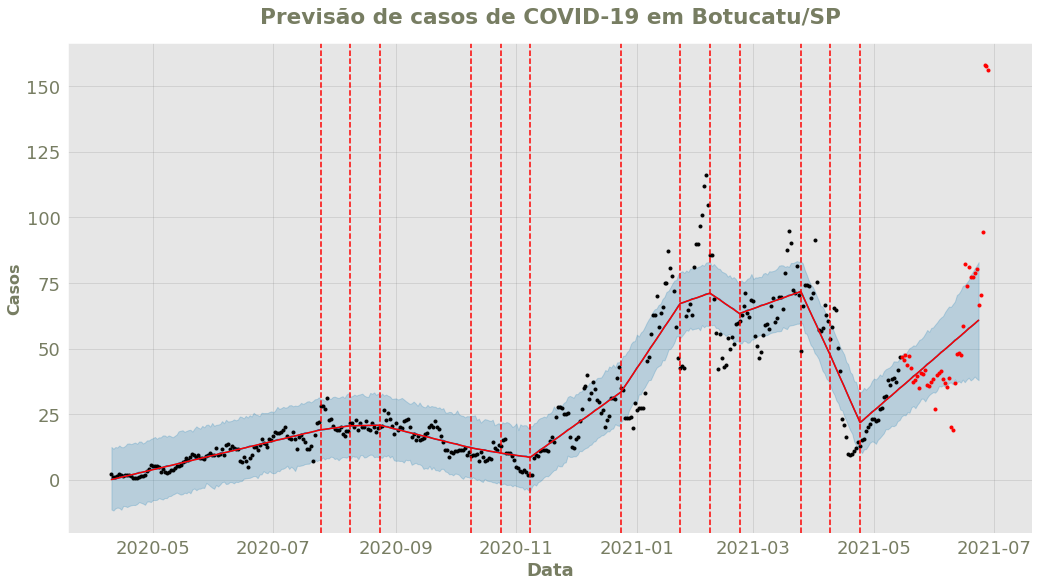

In [125]:
fig = modelo3_casos.plot(previsao3_casos, figsize=(15,8));
a = add_changepoints_to_plot(fig.gca(), modelo3_casos, previsao3_casos)
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Casos', fontsize=16, fontdict=font_t)
plt.title('Previsão de casos de COVID-19 em Botucatu/SP', pad= 20, fontdict=font_t)
plt.show()

Percebemos que este gráfico já mostra um **modelo muito mais ajustado** aos dados, tanto os dados usados para criar o modelo (pontos escuros) como os dados de teste(pontos vermelhos) ficaram em sua grande **maioria dentro no intervalo de confiança**(sombra azul em volta da curva de previsão).

Vou analisar o mean absolute error para este modelo para confirmar se ele é realmente melhor:

In [100]:
mean_absolute_error(botucatu['y'],previsao3_casos['yhat'][:400])

5.847364294240094

E conforme esperado, o modelo realmente apresentou **um erro médio bem menor** que os anteriores.

Por fim, vou testar um último modelo de previsão de casos. Neste modelo, farei uma alteração dos meus dados, **excluindo os dados outliers** em relação ao modelo anterior, que é o melhor até agora.

In [104]:
novo_y = botucatu.reset_index()

In [105]:
sem_outliers_casos = novo_y[(novo_y['y']> previsao3_casos['yhat_lower'][:400]) & (novo_y['y'] < previsao3_casos['yhat_upper'][:400])]

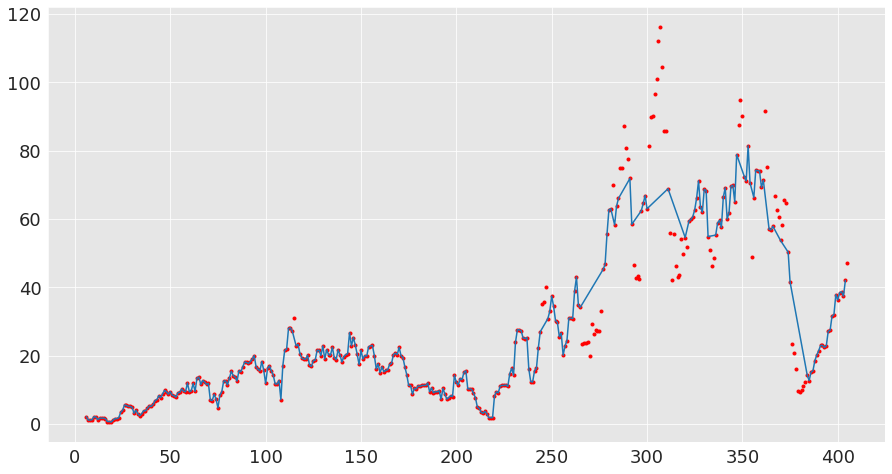

In [106]:
plt.plot(botucatu.index, botucatu['y'],'r.')
plt.plot(sem_outliers_casos['index'], sem_outliers_casos['y'])

Os pontos fora do modelo(linha azul) serão excluídos dos dados utilizados para definir o novo modelo, sem outliers.

In [107]:
casos_sem_outliers = sem_outliers_casos[['ds', 'y']]
casos_sem_outliers

,ds,y
0,2020-04-10,2.142857
1,2020-04-11,1.142857
2,2020-04-12,1.142857
3,2020-04-13,1.285714
4,2020-04-14,2.142857
...,...,...
394,2021-05-09,36.285714
395,2021-05-10,38.428571
396,2021-05-11,38.714286
397,2021-05-12,37.428571


In [110]:
modelo3_sem_out = Prophet(n_changepoints = 25 ,changepoint_prior_scale=0.5, changepoint_range=0.95)
modelo3_sem_out.fit(casos_sem_outliers)
botfuturo3_sem = modelo3_sem_out.make_future_dataframe(periods=40)
previsao3_out = modelo3_sem_out.predict(botfuturo3_sem)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


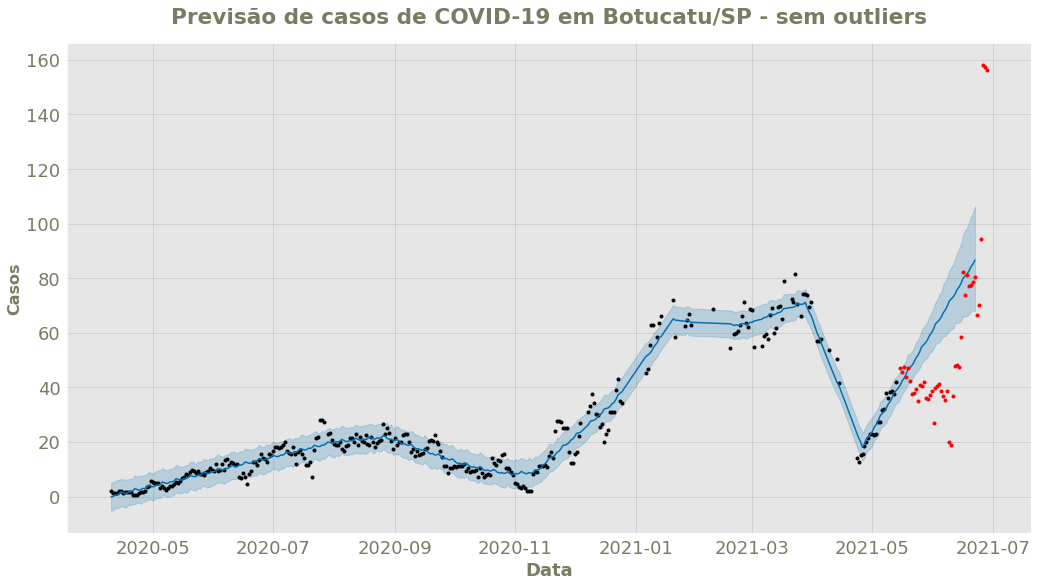

In [126]:
fig = modelo3_sem_out.plot(previsao3_out, figsize=(15,8));
plt.plot(df_teste['ds'],df_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Casos', fontsize=16, fontdict=font_t)
plt.title('Previsão de casos de COVID-19 em Botucatu/SP - sem outliers', pad= 20, fontdict=font_t)
plt.show()


**Visualmente, este modelo parece bem ajustado aos dados iniciais, porém os dados de teste ficaram em sua maioria fora da previsão.**


In [113]:
mean_absolute_error(casos_sem_outliers['y'],previsao3_out['yhat'][:332])

2.8996377324940803

O erro médio absoluto calculado também foi bem menor para esse modelo. Entretanto, acredito que esse modelo está **overfit**, o que explica os **dados de teste ficarem** em sua grande parte **fora da previsão**. Dessa forma, acredito que o terceiro modelo testado será capaz de fazer melhores previsões.

**4.1.2 Óbitos**

Agora, vou criar alguns modelos de previsão de óbitos.

In [115]:
botucatu_obitos= pd.DataFrame()
botucatu_obitos['ds'] = dados_botucatu['date'][:400]
botucatu_obitos['y'] =dados_botucatu['media_movel_obitos'][:400]

In [116]:
botucatu_obitos

,ds,y
6,2020-04-10,0.142857
7,2020-04-11,0.142857
8,2020-04-12,0.142857
9,2020-04-13,0.142857
10,2020-04-14,0.285714
...,...,...
401,2021-05-10,0.857143
402,2021-05-11,0.571429
403,2021-05-12,0.428571
404,2021-05-13,0.142857


In [117]:
modelo_obitos=Prophet()

In [118]:
modelo_obitos.fit(botucatu_obitos)
obitos_futuros = modelo_obitos.make_future_dataframe(periods=60)
previsao_obitos = modelo_obitos.predict(obitos_futuros)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
obitos_teste = pd.DataFrame()
obitos_teste['ds'] = dados_botucatu['date'][400:]
obitos_teste['y'] =dados_botucatu['media_movel_obitos'][400:]

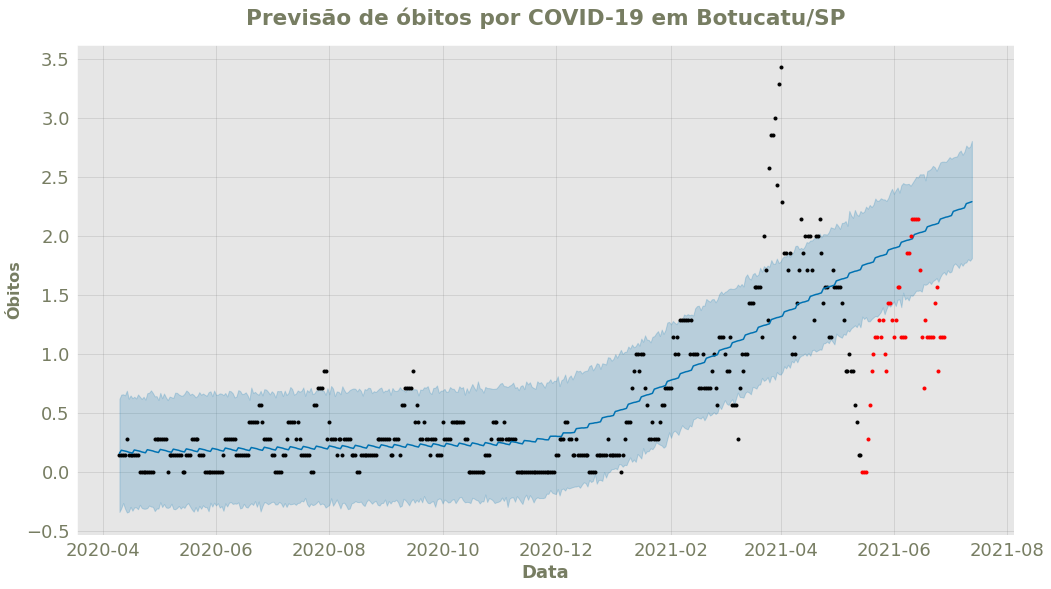

In [122]:
modelo_obitos.plot(previsao_obitos, xlabel='Data', ylabel='Óbitos novos', figsize=(15,8))
plt.plot(obitos_teste['ds'],obitos_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Óbitos', fontsize=16, fontdict=font_t)
plt.title('Previsão de óbitos por COVID-19 em Botucatu/SP', pad= 20, fontdict=font_t)
plt.show()


Nesse primeiro modelo, **sem alteração de parâmetros**, temos **muitos dados fora do intervalo de confiança**, principalmente dos dados de teste. Dessa forma, não parece ser um modelo de previsão bom.

In [130]:
mean_absolute_error(botucatu_obitos['y'],previsao_obitos['yhat'][:400])

0.24348310940578674

Fiz o teste de erro médio absoluto para poder comparar com meu próximo modelo. O valor do MAE aqui é bem menor do que o obtido para os modelos de casos porque as quantidades de óbitos (valor da média móvel) são também muito inferiores a quantidade de casos.

In [131]:
modelo2_obitos=Prophet(n_changepoints = 25 ,changepoint_prior_scale=0.5, changepoint_range=0.90)
modelo2_obitos.fit(botucatu_obitos)
obitos_futuros2 = modelo2_obitos.make_future_dataframe(periods=40)
previsao2_obitos = modelo2_obitos.predict(obitos_futuros2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


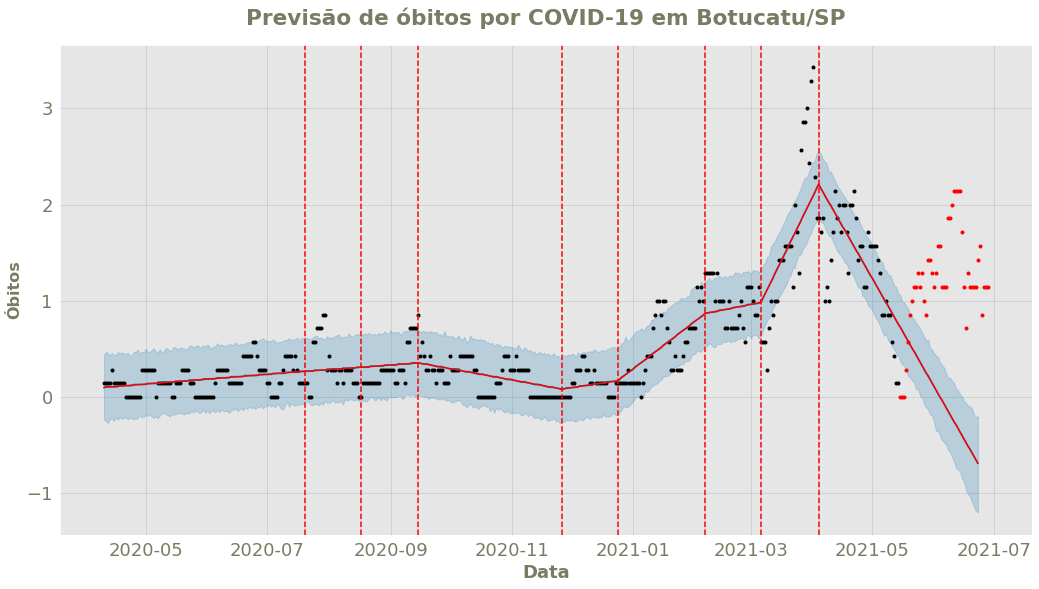

In [132]:
fig = modelo2_obitos.plot(previsao2_obitos, figsize=(15,8));
a = add_changepoints_to_plot(fig.gca(), modelo2_obitos, previsao2_obitos)
plt.plot(obitos_teste['ds'],obitos_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Óbitos', fontsize=16, fontdict=font_t)
plt.title('Previsão de óbitos por COVID-19 em Botucatu/SP', pad= 20, fontdict=font_t)
plt.show()


In [138]:
mean_absolute_error(botucatu_obitos['y'],previsao2_obitos['yhat'][:400])

0.18708188923019872

No caso desse segundo modelo, alterei o changepoint range e a changepoint prior scale, para 0.9 e 0.5, respectivamente. A curva dos dados usados para construir o modelo ficou bem ajustada a esses dados, mas falhou em prever os **dados de teste**, que **ficaram todos fora da curva** praticamente. Mesmo assim, o valor do erro médio foi levemente menor.

**Vou criar mais um modelo, com os mesmos parâmetros porém excluindo os outliers.**

In [133]:
novo_y = botucatu_obitos.reset_index()

In [134]:
sem_outliers_obitos = novo_y[(novo_y['y']> previsao2_obitos['yhat_lower'][:400]) & (novo_y['y'] < previsao2_obitos['yhat_upper'][:400])]

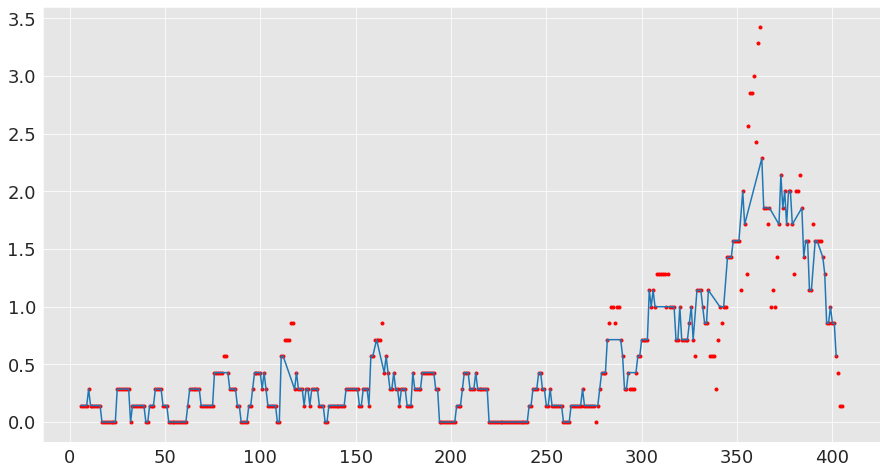

In [135]:
plt.plot(botucatu_obitos.index, botucatu_obitos['y'],'r.')
plt.plot(sem_outliers_obitos['index'], sem_outliers_obitos['y'])

Os pontos fora da curva serão excluídos da minha amostra.

In [136]:
obitos_sem_outliers = sem_outliers_obitos[['ds', 'y']]

In [137]:
obitos_sem_outliers

,ds,y
0,2020-04-10,0.142857
1,2020-04-11,0.142857
2,2020-04-12,0.142857
3,2020-04-13,0.142857
4,2020-04-14,0.285714
...,...,...
392,2021-05-07,0.857143
393,2021-05-08,1.000000
394,2021-05-09,0.857143
395,2021-05-10,0.857143


In [139]:
modelo2_obitos_sem_out = Prophet(n_changepoints = 25 ,changepoint_prior_scale=0.5, changepoint_range=0.90)
modelo2_obitos_sem_out.fit(obitos_sem_outliers)
botfuturo2_sem = modelo2_obitos_sem_out.make_future_dataframe(periods=40)
previsao2_out = modelo2_obitos_sem_out.predict(botfuturo2_sem)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


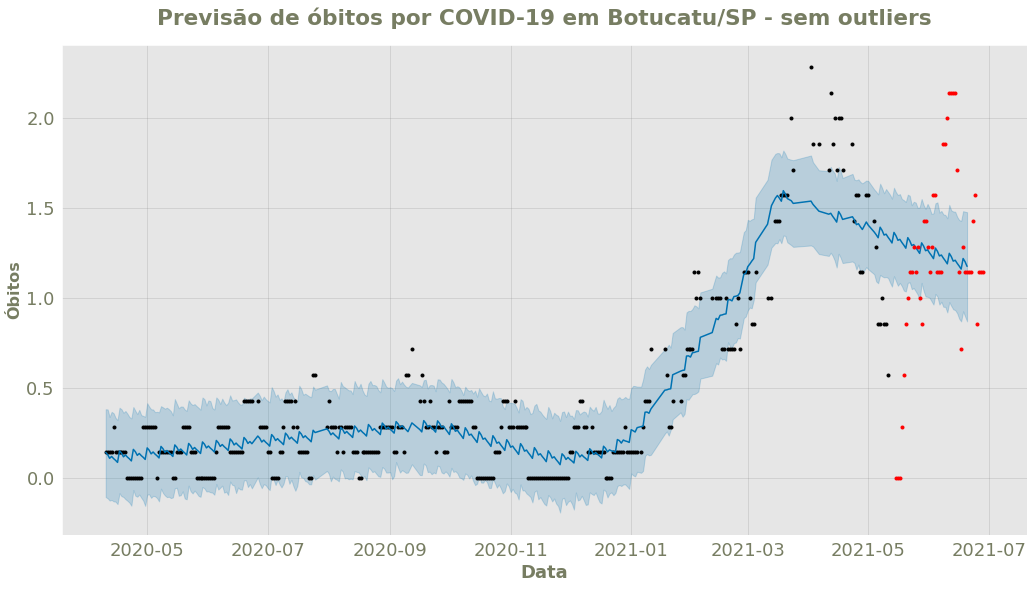

In [140]:
fig = modelo2_obitos_sem_out.plot(previsao2_out, figsize=(15,8));
plt.plot(obitos_teste['ds'],obitos_teste['y'],'.r')
plt.tick_params(labelcolor= '#777D62')
plt.xlabel('Data', fontdict=font_t)
plt.ylabel('Óbitos', fontsize=16, fontdict=font_t)
plt.title('Previsão de óbitos por COVID-19 em Botucatu/SP - sem outliers', pad= 20, fontdict=font_t)
plt.show()

In [141]:
mean_absolute_error(obitos_sem_outliers['y'],previsao2_out['yhat'][:340])

0.14182265266980146

Esse modelo ainda apresenta muitos dados fora do intervalo de segurança, mas a métrica testada (MAE) teve um resultado melhor.

###**4.2 Validação**

Para garantir que um modelo de previsão é bom, não basta dividirmos nosso dados em treino e teste, temos que usar métricas para avaliar o quanto ele está acertando as previsões feitas. 

O Facebook Prophet tem uma função que realiza a validação cruzada de um modelo de previsões.

É necessário separar os dados em dados de treino iniciais e estabelecer um horizonte para testes e previsões, conforme será feito a seguir.

Vou fazer a validação dos modelos de casos e óbitos que considerei os melhores (ajustados porém sem overfitting). O terceiro modelo para previsão de casos (modelo3_casos) e o último modelo para previsão de óbitos (modelo2_obitos_sem_out).

In [151]:
from fbprophet.diagnostics import cross_validation

In [152]:
df_cv = cross_validation(modelo3_casos, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-10-16 00:00:00 and 2021-04-14 00:00:00


In [153]:
df_cv['cutoff'].unique()

array(['2020-10-16T00:00:00.000000000', '2020-11-15T00:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-02-13T00:00:00.000000000', '2021-03-15T00:00:00.000000000',
       '2021-04-14T00:00:00.000000000'], dtype='datetime64[ns]')

In [154]:
cutoff = df_cv['cutoff'].unique()[0]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

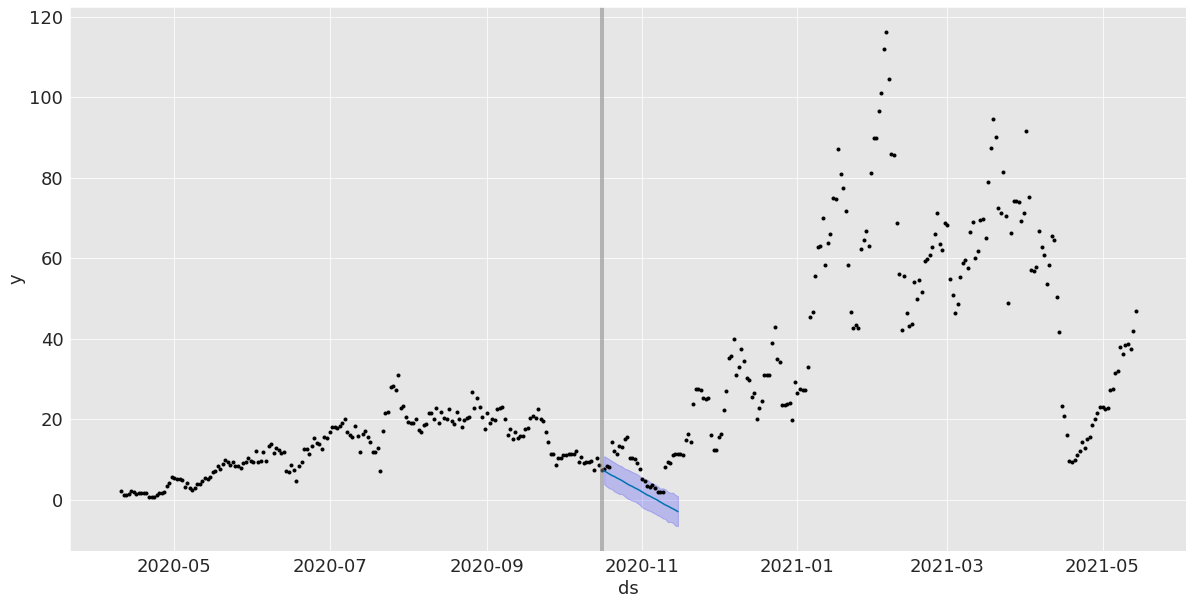

In [155]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo3_casos.history['ds'].values, modelo3_casos.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

Esse gráfico mostra a previsão feita pelo Prophet em um certo intervalo. É possível criar essa visualização para todos os cutoffs criados pela função de cross validation.

Vamos verificar quais foram as métricas encontradas para esse modelo( modelo3_casos):

In [156]:
from fbprophet.diagnostics import performance_metrics

In [157]:
df_p = performance_metrics(df_cv)

In [158]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,489.553026,22.125845,16.986592,0.617948,0.479577,0.285714
1,4 days,578.790080,24.058056,18.803475,0.788003,0.498382,0.190476
2,5 days,615.408374,24.807426,19.523557,0.937182,0.500104,0.142857
3,6 days,624.474971,24.989497,19.693973,1.050314,0.527351,0.095238
4,7 days,587.188212,24.231967,19.542054,1.006699,0.500462,0.095238
5,8 days,649.619891,25.487642,21.277221,0.980023,0.529521,0.095238
6,9 days,728.208524,26.985339,22.746315,0.935989,0.618865,0.095238
7,10 days,799.752608,28.279898,23.815253,0.948815,0.714447,0.095238
8,11 days,815.273770,28.552999,23.794277,0.940411,0.746913,0.095238
9,12 days,753.189930,27.444306,23.204979,0.915376,0.746913,0.095238


Essa tabela contém as métricas de avaliação das previsões. Temos diferentes métricas calculadas. Vou plotar os gráficos de duas dessas métricas para melhor avaliarmos os resultados:

In [159]:
from fbprophet.plot import plot_cross_validation_metric

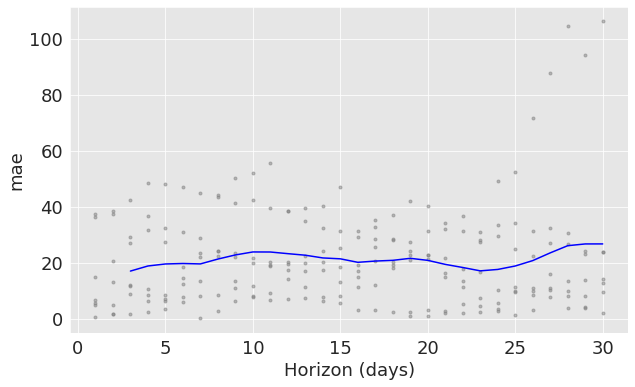

In [160]:
fig = plot_cross_validation_metric(df_cv,metric='mae') 

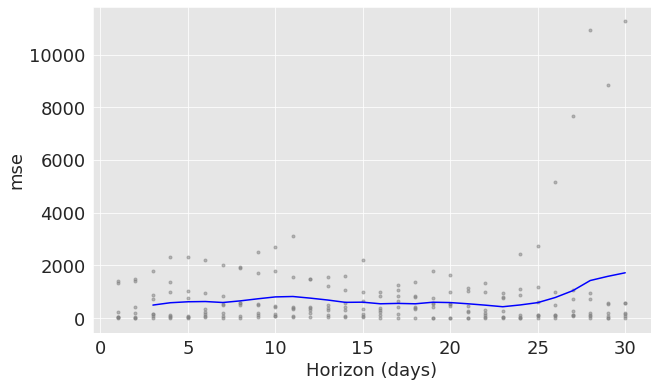

In [161]:
fig = plot_cross_validation_metric(df_cv,metric='mse') 

O gráfico do erro médio absoluto apresenta bons resultados, visto que **não há muitos pontos espalhados**, estando a maioria próximo à curva. Já o segundo gráfico, mostra o erro quadrático médio(MSE)que é definido
como sendo a média da diferença entre o valor do estimador e do parâmetro ao quadrado, nesse caso entre a previsão e os dados reais. A diferença entre essas duas métricas é que a primeira, o MAE, dá um peso igual a todos os desvios, enquanto a segunda (MSE) dá um peso maior para desvios grandes (pois são elevados ao quadrado).
No caso do nosso modelo, houve **um resultado ainda melhor para o MSE**, pois os pontos estão ainda mais concentrados em torno da curva.

Dessa forma, podemos dizer que este modelo de previsão de casos de COVID **parece ser um bom modelo**!

**Passemos então à avaliação do modelo de previsão de óbitos(modelo2_obitos_sem_out).**

In [162]:
df_cv_obitos = cross_validation(modelo2_obitos_sem_out, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-10-13 00:00:00 and 2021-04-11 00:00:00


In [163]:
cutoff_obitos = df_cv_obitos['cutoff'].unique()[0]
df_cv_obitos_cut = df_cv_obitos[df_cv_obitos['cutoff'].values == cutoff_obitos]

In [164]:
df_p_obitos = performance_metrics(df_cv_obitos)

INFO:fbprophet:Skipping MAPE because y close to 0


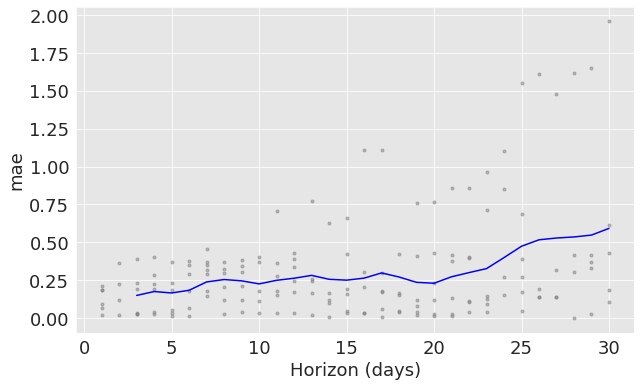

In [165]:
fig = plot_cross_validation_metric(df_cv_obitos,metric='mae') 

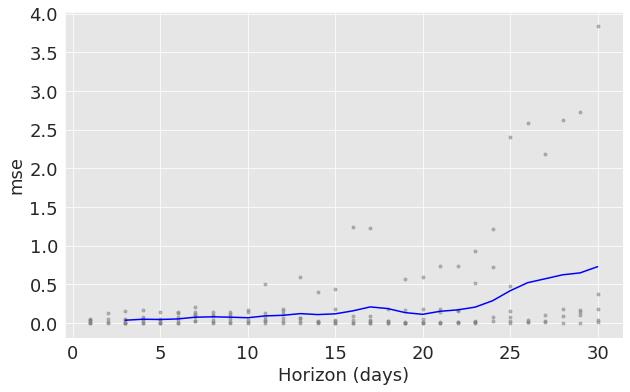

In [166]:
fig = plot_cross_validation_metric(df_cv_obitos,metric='mse') 

**Fiz a cross validation do modelo e analisei as mesmas métricas de performance anlisadas para a previsão dos casos e achei os resultados bastante semelhantes. A maioria dos pontos se concentra proxima da curva e, portanto, acredito que o modelo de previsão obtido deve trazer bons resultados.**

##**5. Conclusão**

**Com a análise dos dados da pandemia de COVID-19 do município de Botucatu foi possível verificar:**

* o **número de casos continua em uma tendência crescente**, com registro de picos de casos no final de junho/2021, quando já se poderia esperar a visualização dos primeiros efeitos da vacinação;
* por outro lado, **o número de óbitos parece estável**, o que pode ser um primeiro efeito da vacina, que é sabidamente eficaz em diminuir a gravidade da doença, como comprovado em diversos estudos realizados;



---


**Com referência à hipótese levantada no início do projeto, acredito que ela não foi comprovada, pois não houve diminuição dos casos e a queda no número de óbitos ainda não é muito significativa.**


Podemos levantar as seguintes **hipóteses para explicar porque os efeitos da vacinação ainda não são claros**:
* O **efeito da vacina não é imediato** e a maioria das vacinas aplicadas no Brasil são vacinas de duas doses, com um intervalo entre doses;
* O **aumento de casos** confirmados na cidade de Botucatu especificamente, pode ser o **resultado de uma maior testagem**, visto a cidade ser objeto de um estudo da eficiência da vacinação. Outra hipótese é que esse aumento de casos seja fruto de um excesso de confiança da população com consequente afrouxamento dos cuidados de higiene, uso de máscaras e distanciamento social;
* um intervalo de tempo maior é necessário para que o organismo crie uma resposta imunológica razoável. Com mais de 80% da população vacinada até o final de junho/2021, já **em meados de julho será possível verificar uma mudança nos números da pandemia em Botucatu.**



---



**A pandemia de COVID-19 ainda parece estar longe de ser controlada**.
Nas análises feitas, aprendemos que a cidade de São Paulo com a maior porcentagem da população vacinada com ao menos uma dose, Botucatu, analisada em detalhe neste projeto, ainda não mostra sinais claros de controle da pandemia. Considerando que as demais cidades do Estado de São Paulo e também do Brasil, vacinaram uma porcentagem muito menor de sua população até o momento, é seguro considerar que o controle da pandemia ainda está distante no Brasil e que **isso só irá mudar com a aceleração da vacinação**.


---



Quanto aos **modelos de previsão**, os melhores ajustes foram conseguidos ao se fazer alterações nos parâmetros **changepoint range e changepoint prior scale**. No caso do modelo de previsão de óbitos, também foram excluídos os outliers. 

A **previsão** obtida para os **casos** de COVID-19 é ainda **de crescimento**, enquanto que a de **óbitos mostra uma tendência de queda**, previsões que parecem ser compatíveis com as análises feitas e a realidade da pandemia em Botucatu no momento. 

Além disso, foi feita uma **cross validation** dos modelos, obtendo-se as métricas de performance dos modelos criados. **Os resultados de performance pareceram satisfatórios**. 

**Contudo, acredito que as previsões feitas pelos modelos não estarão muito ajustadas aos dados reais, pois acredito que os efeitos da vacinação serão muito mais fortes em breve.**

##**6. Referências:**

* https://brasil.io/dataset/covid19/caso_full/
* https://github.com/seade-R/dados-covid-sp
* https://www.saopaulo.sp.gov.br/planosp/simi/dados-abertos/
* https://covid.saude.gov.br/
* https://en.wikipedia.org/wiki/COVID-19
* https://blog.brasil.io/2020/03/23/dados-coronavirus-por-municipio-mais-atualizados/
* https://brasil.io/dataset/covid19/caso_full/
* https://g1.globo.com/sp/bauru-marilia/noticia/2021/04/27/botucatu-participa-de-pesquisa-inedita-de-vacinacao-em-massa-contra-a-covid-19.ghtml
* https://g1.globo.com/sp/bauru-marilia/noticia/2021/05/16/vacinacao-em-massa-termina-com-mais-de-65-mil-doses-da-astrazeneca-aplicadas-em-botucatu.ghtml
* https://exame.com/brasil/botucatu-tem-queda-de-48-em-casos-de-covid-5-semanas-apos-vacinacao/
* https://www.cnnbrasil.com.br/saude/2021/06/28/covid-19-vacinacao-em-massa-em-botucatu-sp-reduz-casos-em-71
* https://www.bbc.com/portuguese/geral-56916558
* https://www.cnnbrasil.com.br/saude/2021/05/19/vacina-nao-impede-de-contrair-covid-19-mas-evita-gravidade-e-morte-entenda
* https://g1.globo.com/bemestar/vacina/noticia/2021/05/01/vacina-astrazeneca-entenda-qual-a-protecao-da-1a-dose-e-qual-o-motivo-do-intervalo-de-tres-meses-para-a-2a.ghtml
* Foto de cottonbro no Pexels
* Foto de CDC no Pexels
* Foto de Markus Spiske no Pexels


